In [1]:
import pandas as pd
import geopy.distance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

C:\Users\hanim\AppData\Local\Temp\ipykernel_15708\3964460364.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data=pd.read_csv('uber.csv')

data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


{'whiskers': [<matplotlib.lines.Line2D at 0x27deb12c3b0>,
 'caps': [<matplotlib.lines.Line2D at 0x27deb12ca10>,
 'boxes': [<matplotlib.lines.Line2D at 0x27de3b77ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x27deb12d070>],
 'fliers': [<matplotlib.lines.Line2D at 0x27deb12d370>],
 'means': []}

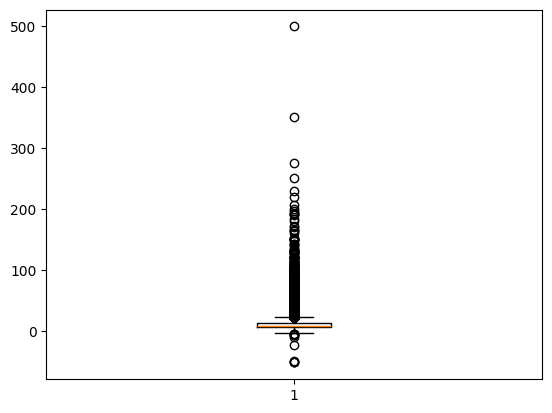

In [3]:
plt.boxplot(data["fare_amount"])


In [4]:
q1=data['fare_amount'].quantile(0.25)
q3=data['fare_amount'].quantile(0.75)
IQR=q3-q1
LB=q1-1.5*IQR
UB=q3+1.5*IQR
data = data[(data['fare_amount']>=LB) & (data['fare_amount']<=UB) ]
data.shape


(182833, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x27deb1cd370>,
 'caps': [<matplotlib.lines.Line2D at 0x27deb1cd9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27deb1cd160>],
 'medians': [<matplotlib.lines.Line2D at 0x27deb1cdf70>],
 'fliers': [<matplotlib.lines.Line2D at 0x27deb1ce270>],
 'means': []}

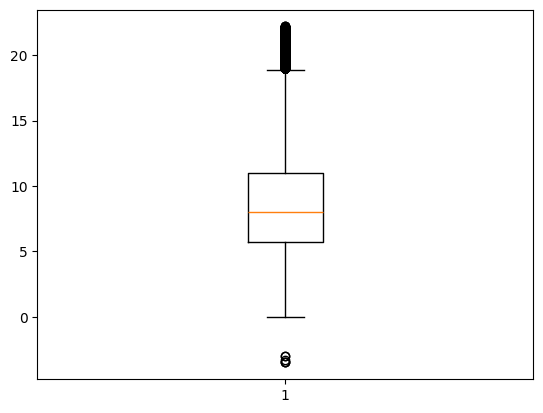

In [5]:
plt.boxplot(data["fare_amount"])

In [6]:
data.drop(['passenger_count','Unnamed: 0','key'],axis=1,inplace=True)

In [7]:
data.info()

data.isnull().sum()

data=data.dropna()

<class 'pandas.core.frame.DataFrame'>
Index: 182833 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        182833 non-null  float64
 1   pickup_datetime    182833 non-null  object 
 2   pickup_longitude   182833 non-null  float64
 3   pickup_latitude    182833 non-null  float64
 4   dropoff_longitude  182833 non-null  float64
 5   dropoff_latitude   182833 non-null  float64
dtypes: float64(5), object(1)
memory usage: 9.8+ MB


In [8]:
data=data[~((data['pickup_latitude']==data['dropoff_latitude'])&(data['pickup_longitude']==data['dropoff_longitude']))]
print(f'After dropping the data, the final shape is {data.shape}')

After dropping the data, the final shape is (177704, 6)


In [9]:
data=data[~(data['fare_amount']<0)]
print(f'After dropping the data, the final shape is {data.shape}')

After dropping the data, the final shape is (177698, 6)


In [10]:
data = data[(data.pickup_latitude<90) & (data.dropoff_latitude<90) &
        (data.pickup_latitude>-90) & (data.dropoff_latitude>-90) &
        (data.pickup_longitude<180) & (data.dropoff_longitude<180) &
        (data.pickup_longitude>-180) & (data.dropoff_longitude>-180)]

In [11]:
data.pickup_datetime=pd.to_datetime(data.pickup_datetime)

data['year'] = data.pickup_datetime.dt.year
data['month'] = data.pickup_datetime.dt.month
data['weekday'] = data.pickup_datetime.dt.weekday
data['hour'] = data.pickup_datetime.dt.hour

C:\Users\hanim\AppData\Local\Temp\ipykernel_15708\854322768.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['year'],y=data['fare_amount'],palette='viridis')


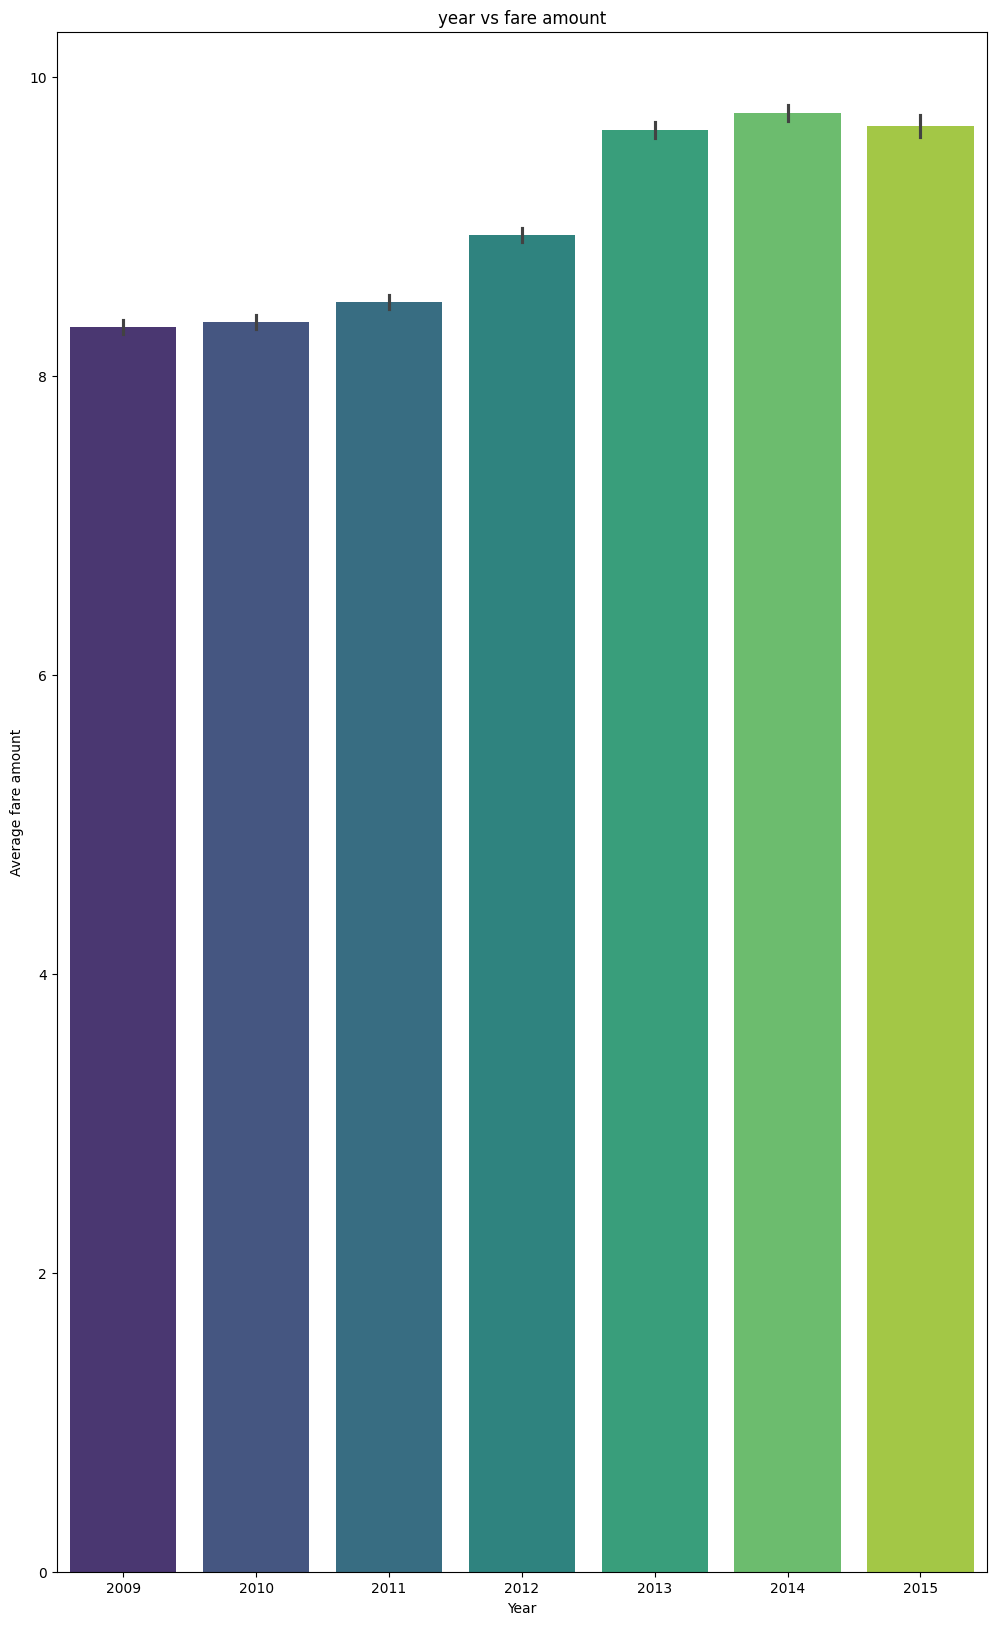

In [12]:
plt.figure(figsize=(12,20))
plt.title('year vs fare amount')
sns.barplot(x=data['year'],y=data['fare_amount'],palette='viridis')
plt.xlabel('Year')
plt.ylabel('Average fare amount')
plt.show()

C:\Users\hanim\AppData\Local\Temp\ipykernel_15708\2087143356.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['month'],y=data['fare_amount'],palette='viridis',estimator=sum )


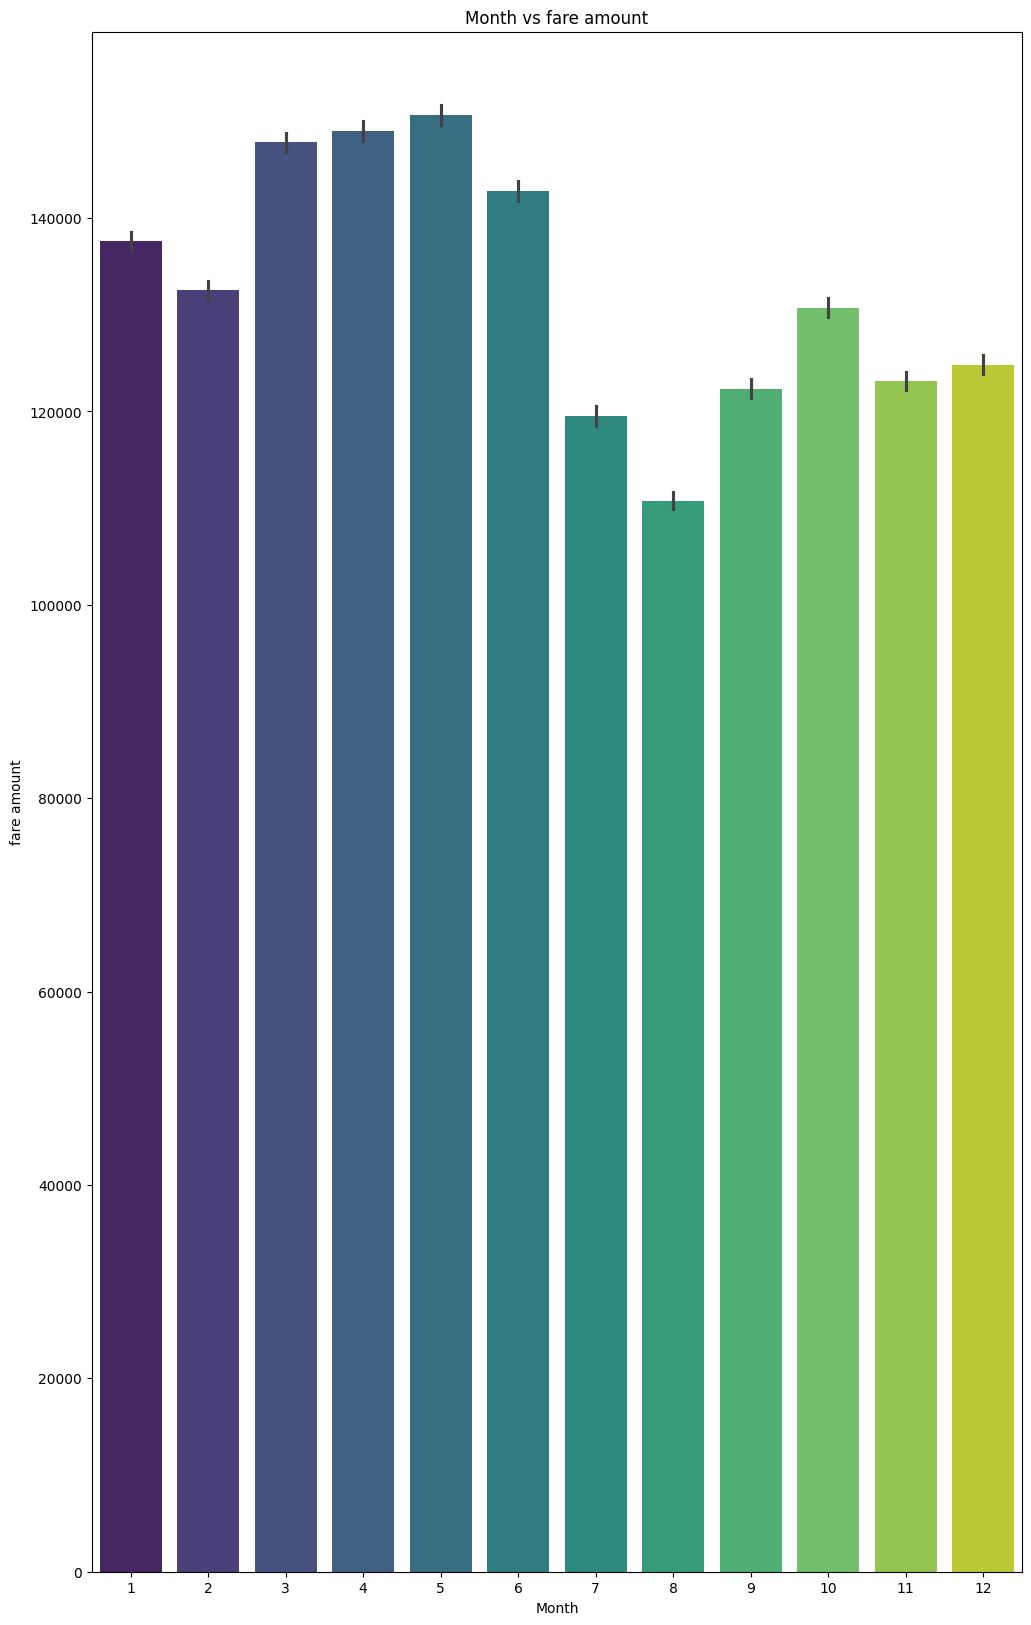

In [13]:

plt.figure(figsize=(12,20))
plt.title('Month vs fare amount')
sns.barplot(x=data['month'],y=data['fare_amount'],palette='viridis',estimator=sum )
plt.xlabel('Month')
plt.ylabel('fare amount')
plt.show()

C:\Users\hanim\AppData\Local\Temp\ipykernel_15708\3880263846.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['hour'],y=data['fare_amount'],palette='viridis',estimator=sum)


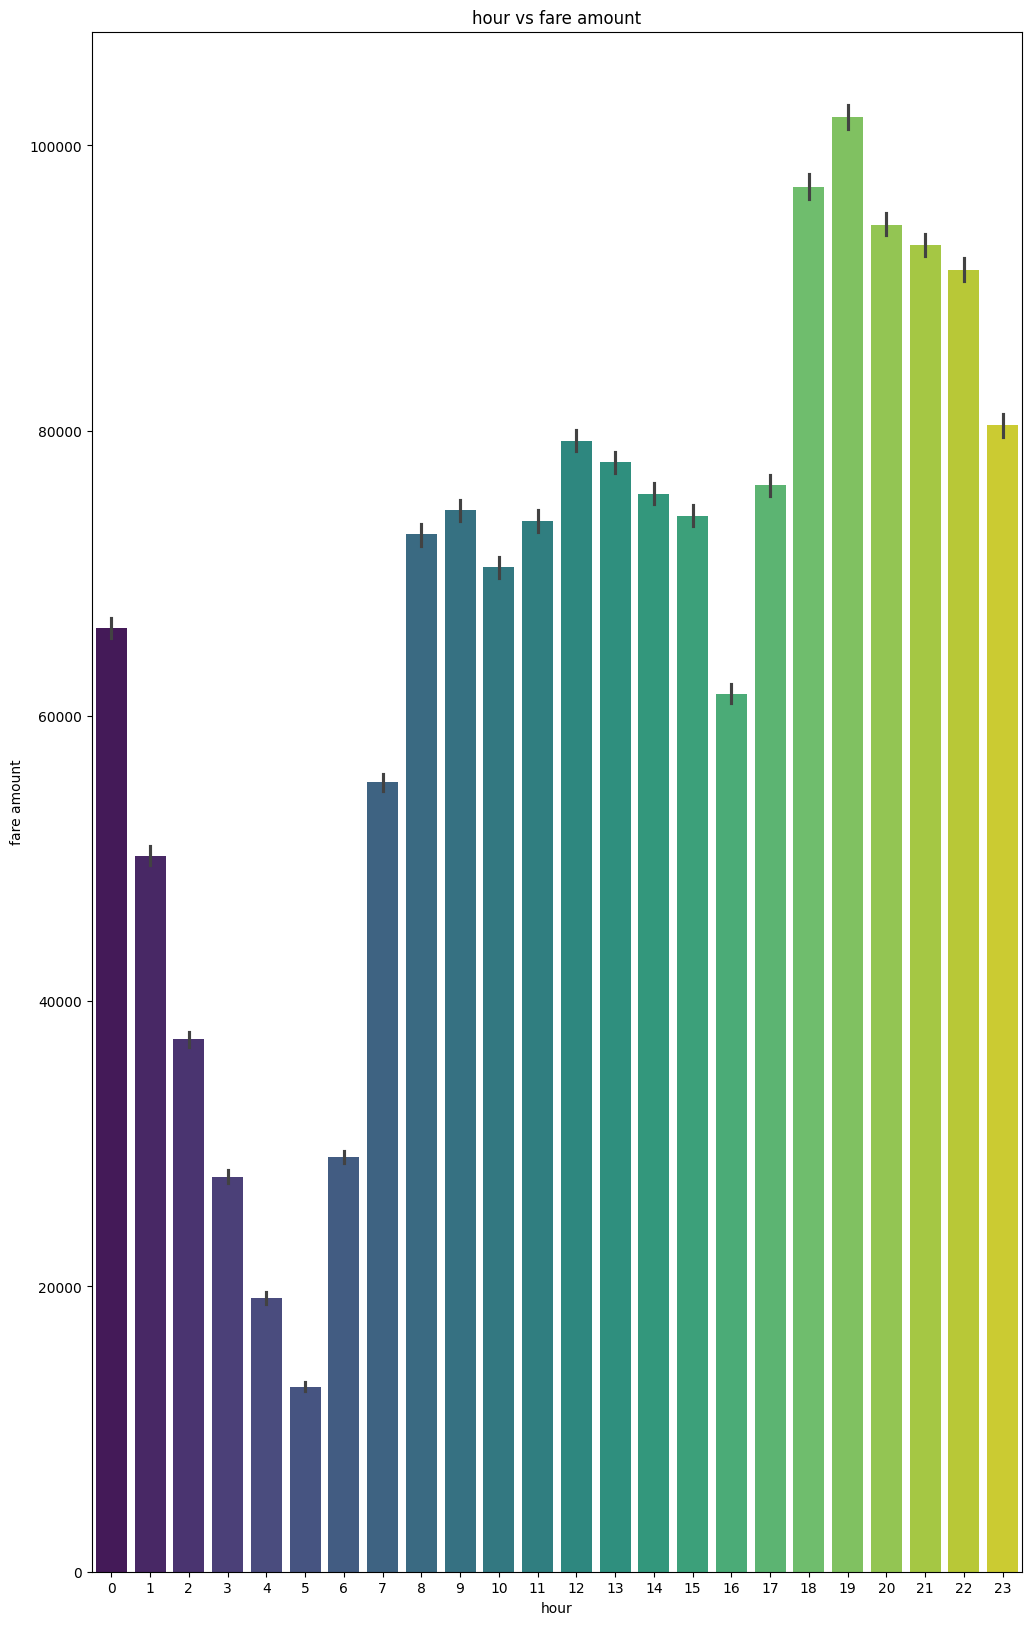

In [14]:
plt.figure(figsize=(12,20))
plt.title('hour vs fare amount')
sns.barplot(x=data['hour'],y=data['fare_amount'],palette='viridis',estimator=sum)
plt.xlabel('hour')
plt.ylabel('fare amount')
plt.show()

C:\Users\hanim\AppData\Local\Temp\ipykernel_15708\1151208871.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['weekday'],y=data['fare_amount'],palette='viridis',estimator=sum)


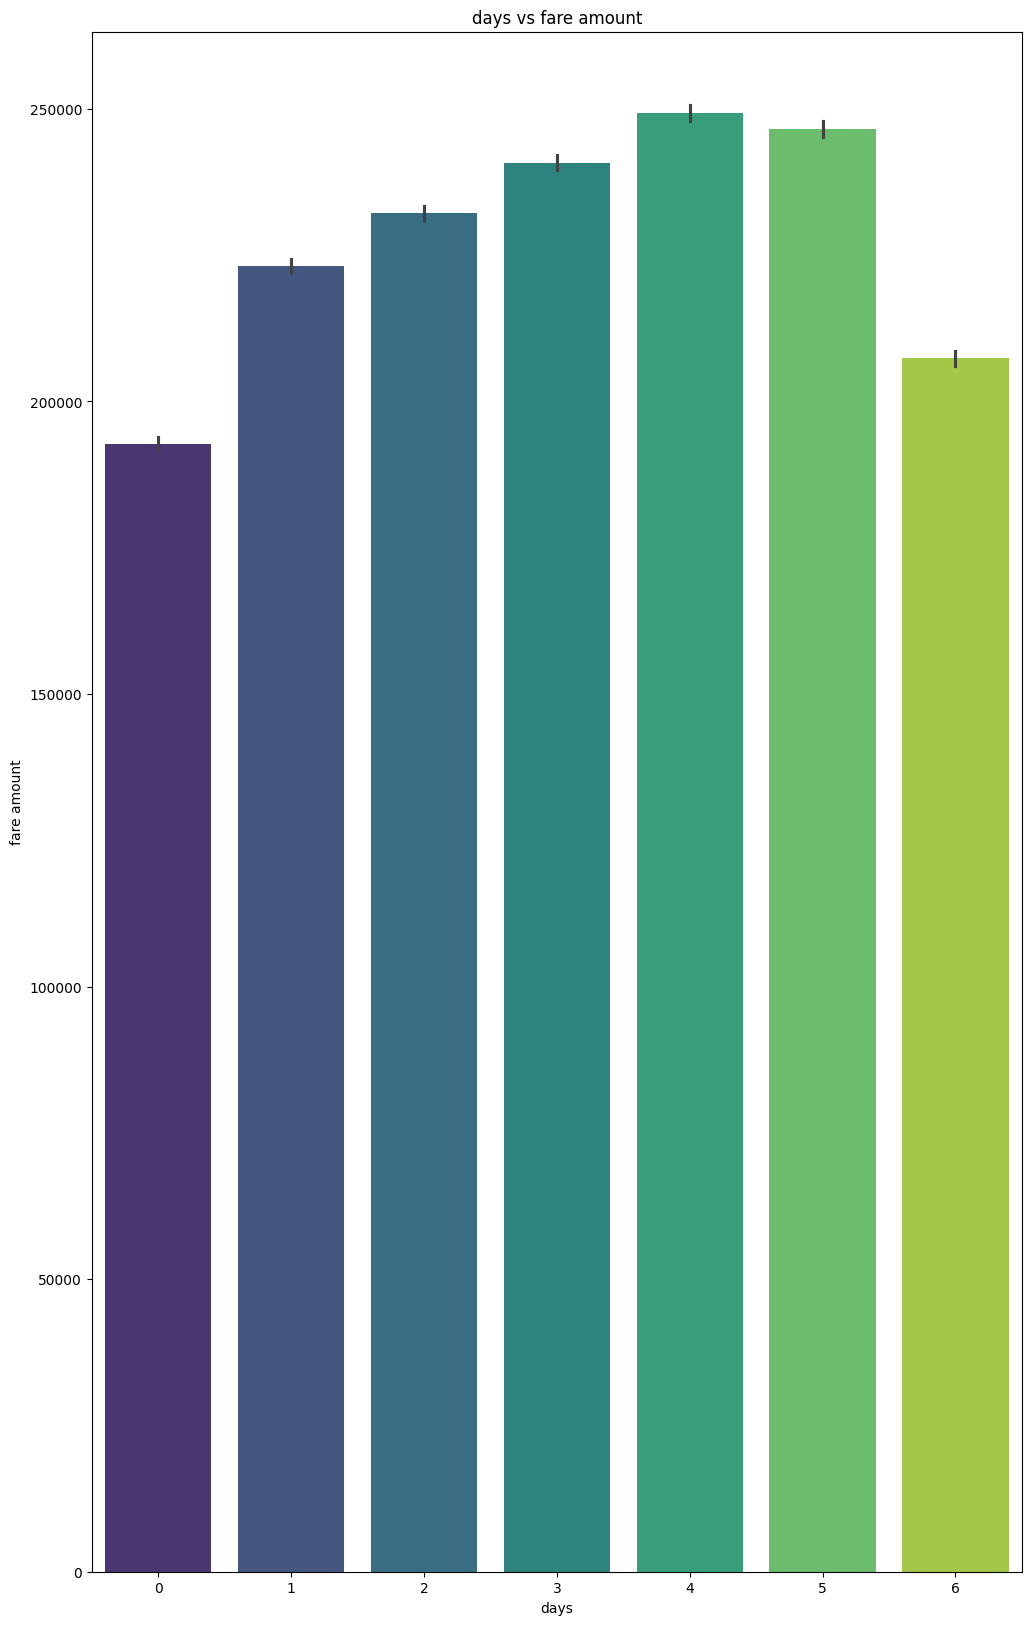

In [15]:
plt.figure(figsize=(12,20))
plt.title('days vs fare amount')
sns.barplot(x=data['weekday'],y=data['fare_amount'],palette='viridis',estimator=sum)
plt.xlabel('days')
plt.ylabel('fare amount')
plt.show()

In [16]:
data['distance']=[round(geopy.distance.distance((data.pickup_latitude[i], data.pickup_longitude[i]),(data.dropoff_latitude[i], data.dropoff_longitude[i])).m,2) for i in data.index]

In [17]:
data.drop(['pickup_datetime'], axis=1, inplace=True)

In [18]:
original_data = data.copy(deep=True)

In [19]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,month,weekday,hour,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,2015,5,3,19,1681.11
1,7.7,-73.994355,40.728225,-73.994710,40.750325,2009,7,4,20,2454.36
2,12.9,-74.005043,40.740770,-73.962565,40.772647,2009,8,0,21,5039.60
3,5.3,-73.976124,40.790844,-73.965316,40.803349,2009,6,4,8,1661.44
4,16.0,-73.925023,40.744085,-73.973082,40.761247,2014,8,3,17,4483.73


In [20]:
q1=data['distance'].quantile(0.25)
q3=data['distance'].quantile(0.75)
IQR=q3-q1
LB=q1-1.5*IQR
UB=q3+1.5*IQR
data = data[(data['distance']>=LB) & (data['distance']<=UB) ]
data.shape

(169652, 10)

In [21]:
q1=data['fare_amount'].quantile(0.25)
q3=data['fare_amount'].quantile(0.75)
IQR=q3-q1
LB=q1-1.5*IQR
UB=q3+1.5*IQR
data = data[(data['fare_amount']>=LB) & (data['fare_amount']<=UB) ]
data.shape

(165419, 10)

In [22]:
data.describe()

data.duplicated().sum()

0

In [23]:
data.drop_duplicates(inplace= True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165419 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        165419 non-null  float64
 1   pickup_longitude   165419 non-null  float64
 2   pickup_latitude    165419 non-null  float64
 3   dropoff_longitude  165419 non-null  float64
 4   dropoff_latitude   165419 non-null  float64
 5   year               165419 non-null  int32  
 6   month              165419 non-null  int32  
 7   weekday            165419 non-null  int32  
 8   hour               165419 non-null  int32  
 9   distance           165419 non-null  float64
dtypes: float64(6), int32(4)
memory usage: 11.4 MB


In [24]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()
for column in data.columns:
  if data[column].dtype=='object':
    data[column] = LabelEncoder.fit_transform(data[column].astype(str))

In [25]:
scaler = StandardScaler()
features_to_scale = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','distance']
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

x=data.drop('fare_amount',axis=1)
y=data['fare_amount']

In [26]:
x.head

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [27]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(x_train,y_train)
y_pred_xgb_test=xgb_model.predict(x_test)
xgb_model_mse_test=mean_squared_error(y_test,y_pred_xgb_test)
print(f'Mean Squared Error of test (Xgboost Regression): {xgb_model_mse_test}')

Mean Squared Error of test (Xgboost Regression): 2.459444124700397


In [29]:
LR_model = LinearRegression().fit(x_train, y_train)
y_pred_LR = LR_model.predict(x_test)
LR_model_mse = mean_squared_error(y_test, y_pred_LR)
print(f'Mean Squared Error (Linear Regression): {LR_model_mse}')

Mean Squared Error (Linear Regression): 3.628382658860243


In [30]:
huber_model = HuberRegressor()
huber_model.fit(x_train, y_train)
y_pred_huber = huber_model.predict(x_test)
huber_model_mse = mean_squared_error(y_test, y_pred_huber)
print(f'Mean Squared Error (Huber Regression): {huber_model_mse}')

Mean Squared Error (Huber Regression): 4.073466178422943


C:\Users\hanim\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [31]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)
ridge_model_mse = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Ridge Regression): {ridge_model_mse}')

Mean Squared Error (Ridge Regression): 3.630459436877601


In [32]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)
y_pred_rf = random_forest_model.predict(x_test)
rf_model_mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {rf_model_mse}')

Mean Squared Error (Random Forest): 2.7912470163176555


In [33]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_test)
lasso_model_mse = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error (lasso Regression): {lasso_model_mse}')

Mean Squared Error (lasso Regression): 5.015153346601952


In [34]:
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet_model.fit(x_train, y_train)
y_pred_elasticnet = elasticnet_model.predict(x_test)
elasticnet_model_mse = mean_squared_error(y_test, y_pred_elasticnet)
print(f'Mean Squared Error (ElasticNet Regression): {elasticnet_model_mse}')

Mean Squared Error (ElasticNet Regression): 5.287270464413518


In [35]:
decision_tree_model = DecisionTreeRegressor(max_depth=None, random_state=42)
decision_tree_model.fit(x_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(x_test)
decision_tree_model_mse = mean_squared_error(y_test, y_pred_decision_tree)
print(f'Mean Squared Error (decision tree model): {decision_tree_model_mse}')

Mean Squared Error (decision tree model): 5.825328599927457


In [36]:
import pickle

filename = "XGboost.pkl"
pickle.dump(xgb_model, open(filename, "wb"))


data.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,month,weekday,hour,distance
0,7.5,-0.030638,0.016865,-0.030974,0.010690,2015,5,3,19,-0.398120
1,7.7,-0.028491,0.012789,-0.029087,0.021598,2009,7,4,20,0.165082
2,12.9,-0.032691,0.017837,-0.016455,0.030580,2009,8,0,21,2.048058
3,5.3,-0.021327,0.037986,-0.017536,0.042934,2009,6,4,8,-0.412447
4,16.0,-0.001245,0.019171,-0.020588,0.025993,2014,8,3,17,1.643187
